In [4]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import plot_temperature as p_info

def chaleur2D_mixte_exp(Nx, Ny, cfl, pos, T):

    plt.close("all")
    
    L = 1 #longueur des intervalles
    nu = 1
    Tini = 20. #temperature initial
    Text = 5. #temperature exterieure

    hx = L / Nx #pas de temps dans les x
    hy = L / Ny #pas de temps dans les y
    Ncell = Nx * Ny #nombre de partitions dans l'espace

    if cfl == 0:
        Nt = int(input('Nombre de pas de temps : '))
        delta = T / Nt
        Nt2 = Nt
    else: #comme ça on s'assure que le pas de temps verifie la condition CFL
        delta = cfl * (hx**2 * hy**2) / (nu * (hx**2 + hy**2))
        Nt = int(np.floor(T / delta)) #on prend le int plus petit avant le float
        if Nt * delta != T:
            Nt2 = Nt + 1
        else:
            Nt2 = Nt

    #print(f"Le nombre de pas de temps est {Nt2}")
    #print(f"pour un pas de temps de {delta}")

    nimp = 10
    dnimp = int(np.floor(Nt2 / nimp))

    lambdax = nu * delta / hx**2 #constantes presents dans notre schéma
    lambday = nu * delta / hy**2

    x = np.linspace(0, L, Nx + 1) #maillage pour les x
    y = np.linspace(0, L, Ny + 1) #maillage pour les y
    t = np.linspace(0, T, Nt2 + 1) #maillage pour le temps

    u = np.zeros((Nx + 1, Ny + 1)) #initialisation de la fonction temperature
    uold = np.zeros((Nx + 1, Ny + 1))
    uini = np.zeros((Nx + 1, Ny + 1))
    u[:, :] = Tini
    for j in range(Ny + 1): #on continue de mettre la fonction initial sou les bonnes valeurs selon les contraintes
        if 0.4 <= y[j] <= 0.6:
            u[0, j] = Text
    uold[:]=u[:]
    uini[:]=u[:]

    minnn = min(Text, Tini)
    maxxx = max(Text, Tini)
    
    X, Y = np.meshgrid(x, y)

    #p_info.plot_info_init(X, Y, uini, minnn, maxxx)
    
    for n in range(1, Nt2 + 1):
        if n > Nt + 1:
            delta = T - Nt * delta #delta qui change pour assurer qu'on depasse pas le temps final
            lambdax = nu * delta / hx**2
            lambday = nu * delta / hy**2

        for i in range(1, Nx):
            for j in range(1, Ny): #on approxime la solution dans le centre sans problème
                u[i, j] = (1 - 2 * (lambdax + lambday)) * uold[i, j] + \
                        lambdax * (uold[i + 1, j] + uold[i - 1, j]) + \
                        lambday * (uold[i, j + 1] + uold[i, j - 1]) + \
                        fct_src(x[i], y[j], pos, uold[i, j]) * delta

        for i in range(1, Nx): #on approxime les solutions aux bords avec approximations de la dérivé
            u[i, 0] = (4 * u[i, 1] - u[i, 2]) / 3
            u[i, Ny] = (4 * u[i, Ny - 1] - u[i, Ny - 2]) / 3
        for j in range(1, Ny): #Même, on approxime les solutions aux bords avec approximations de la derivée
            if 0.4 <= y[j] <= 0.6:
                u[0, j] = Text
            else:
                u[0, j] = (4 * u[1, j] - u[2, j]) / 3
            u[Nx, j] = (4 * u[Nx - 1, j] - u[Nx - 2, j]) / 3

        u[0, 0] = (4 * u[1, 0] - u[2, 0] + 4 * u[0, 1] - u[0, 2]) / 6 #ici on pose les approximations pour les coins car ils sont un cas spécial
        u[Nx, Ny] = (4 * u[Nx - 1, Ny] - u[Nx - 2, Ny] + 4 * u[Nx, Ny - 1] - u[Nx, Ny - 2]) / 6
        u[Nx, 0] = (4 * u[Nx - 1, 0] - u[Nx - 2, 0] + 4 * u[Nx, 1] - u[Nx, 2]) / 6
        u[0, Ny] = (4 * u[0, Ny - 1] - u[0, Ny - 2] + 4 * u[1, Ny] - u[2, Ny]) / 6

        
        uold[:]=u[:]
        minnn = min(minnn, np.min(u))
        maxxx = max(maxxx, np.max(u))
    

    p_info.plot_info_fin(X, Y, u[:], minnn, maxxx)

    

def fct_src(x, y, pos, fold):
    """
    fonction pour chaque des problèmes, elle indique la position du radiateur et la fonction de chaleur
    """
    f0 = 1
    frad = 40
    if pos == 1: #ici on indique la position du radiateur
        a, b = 0.9, 1
    elif pos == 2:
        a, b = 0.45, 0.55
    elif pos == 3:
        a, b = 0, 0.1
    else:
        a, b = 1, -1
    c, d = 0.4, 0.6

    ff = 0
    if a <= x <= b and c <= y <= d: #fonction modelisant la precense du radiateur
        ff = f0 * (frad - fold)**3

    return ff


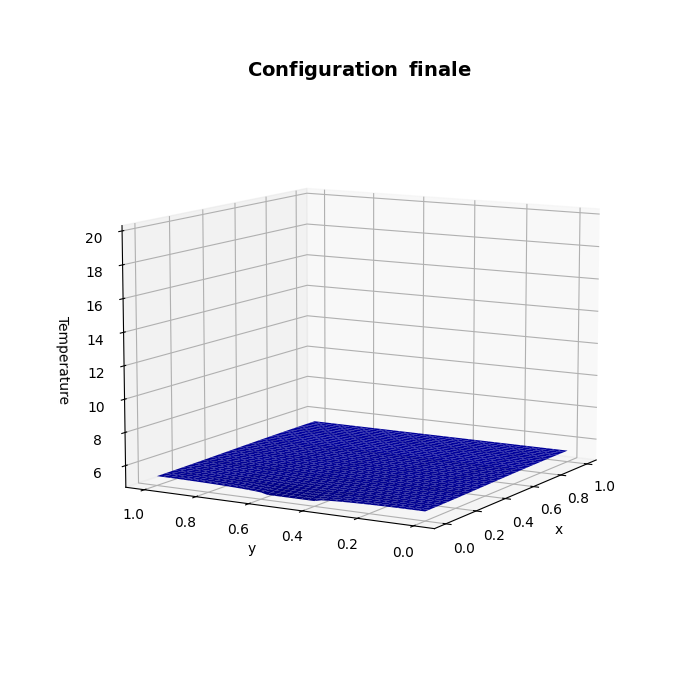

                       La température minimum est de 5.00°C                               
                       La température maximum est de 5.38°C                               
                       La température moyenne est de 5.31°C                               
                       L'écart type des températures est de 0.07°C                        
 


In [5]:
chaleur2D_mixte_exp(40, 40, 0.45, 0, 3)

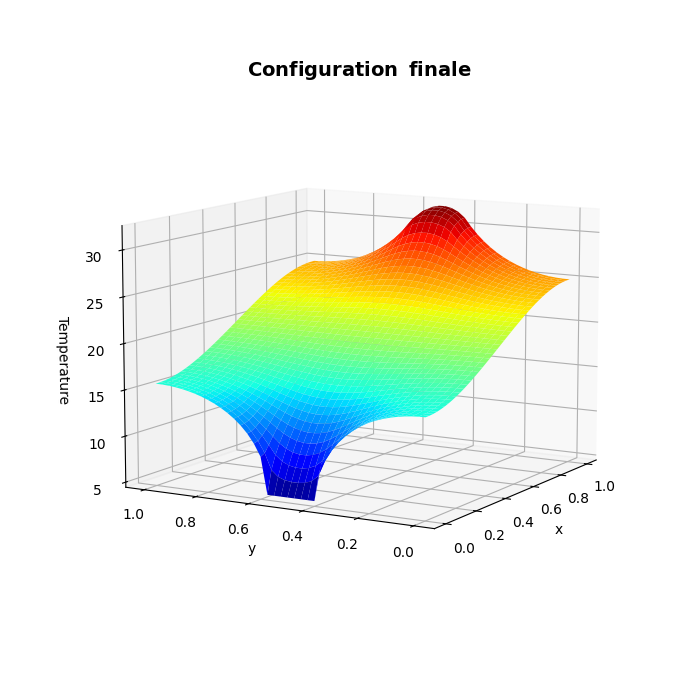

                       La température minimum est de 5.00°C                               
                       La température maximum est de 32.02°C                              
                       La température moyenne est de 20.06°C                              
                       L'écart type des températures est de 5.02°C                        
 


In [6]:
chaleur2D_mixte_exp(40, 40, 0.45, 1, 3)

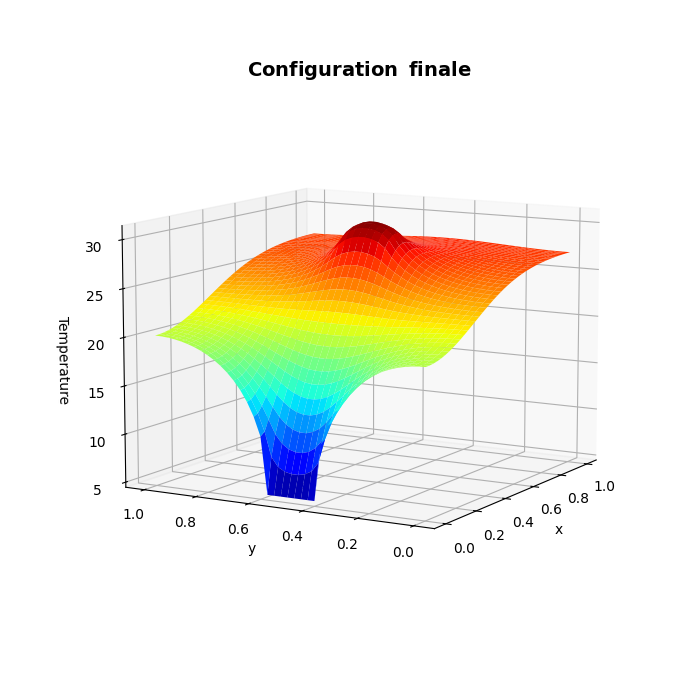

                       La température minimum est de 5.00°C                               
                       La température maximum est de 30.89°C                              
                       La température moyenne est de 24.03°C                              
                       L'écart type des températures est de 4.37°C                        
 


In [7]:
chaleur2D_mixte_exp(40, 40, 0.45, 2, 3)

On voit clairement que positionner le radiateur sous la fenêtre permet l'obtention d'une meilleur température moyenne, avec une meilleure répartition de la chaleur (plus petit écart type)

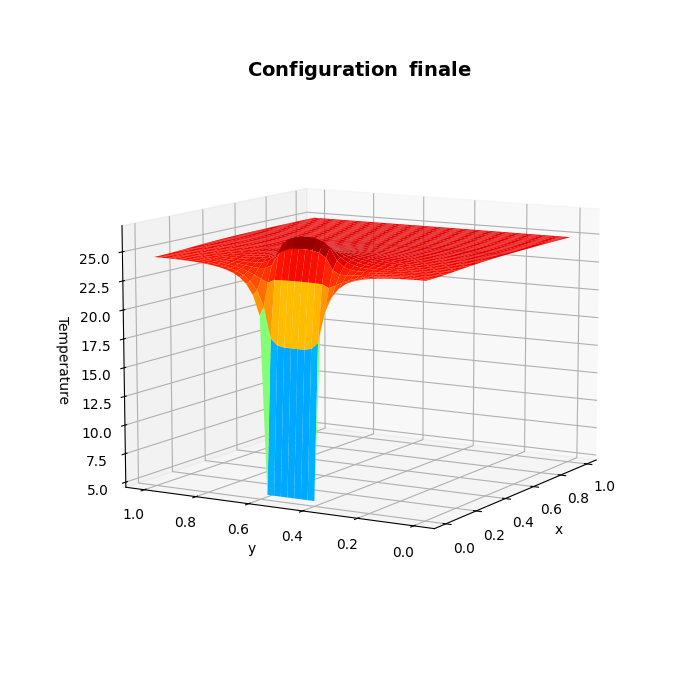

                       La température minimum est de 5.00°C                               
                       La température maximum est de 26.79°C                              
                       La température moyenne est de 24.64°C                              
                       L'écart type des températures est de 1.50°C                        
 


In [8]:
chaleur2D_mixte_exp(40, 40, 0.45, 3, 3)